<a href="https://colab.research.google.com/github/Shiva-kalyanaram/Green-House-Emmission/blob/main/GHS_emmision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

In [8]:
pd.set_option('display.max_columns', None)

In [209]:
df_1 = pd.read_excel('/content/bps_2012_report_english.xlsx')
df_1.head(3)

,Sector Name,Sub Sector,Organization Name,Operation Name,Operation Type,Address,City,Postal Code,Total Floor Area,Unit,Average Hours per week,Annual Flow,Electricity,Electricity Unit,Natural Gas,Natural Gas2,Fuel Oil 1 & 2,Fuel Oil 1 & 2 Unit,Fuel Oil 4 &6,Fuel Oil 4 &6 Unit,Propane,Propane Unit,Coal Quantity,Coal Unit,Wood,Wood3,District Heating,District Heating Unit,Renewable,Renewable Emission Factor,District Cooling,District Cooling Unit,District Cooling Renewable,District Cooling Renewable Emission Factor,Number of Portables,Swimming Pools,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,4660.7,Square meters,168.0,0.0,1.143006e+06,kWh,220977.3500,Cubic Meter,0.0,Litre,0.0,Litre,0.0,Litre,0.0,Metric Tonne,0.0,Metric Tonne,0.0,Giga Joule,False,0.0,0.0,Giga Joule,False,0.0,0.0,False,527560.002122,69.597090,0.0,2.696894,0.0
1,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Administrative offices and related facilities,29 Noxon Street,Ingersoll,N5C3V6,3813.3,Square meters,40.0,0.0,9.351864e+05,kWh,180799.6500,Cubic Meter,0.0,Litre,0.0,Litre,0.0,Litre,0.0,Metric Tonne,0.0,Metric Tonne,0.0,Giga Joule,False,0.0,0.0,Giga Joule,False,0.0,0.0,False,431640.001737,69.597090,0.0,2.696894,0.0
2,Public Hospital,Acute/Chronic,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Facilities used for hospital purposes,20260 County Road 43,Alexandria,K0C1A0,51016.0,Square feet,168.0,0.0,1.669888e+06,kWh,225403.4984,Cubic Meter,0.0,Litre,0.0,Litre,0.0,Litre,0.0,Metric Tonne,0.0,Metric Tonne,0.0,Giga Joule,False,0.0,0.0,Giga Joule,False,0.0,0.0,False,586529.974768,79.689235,0.0,3.087966,0.0


In [203]:
df_1.columns

Index(['Sector Name', 'Sub Sector ', 'Organization Name', 'Operation Name',
       'Operation Type', 'Address', 'City', 'Postal Code', 'Total Floor Area ',
       'Unit', 'Average Hours per week', 'Annual Flow ', 'Electricity',
       'Electricity Unit', 'Natural Gas', 'Natural Gas2', 'Fuel Oil 1 & 2',
       'Fuel Oil 1 & 2 Unit', 'Fuel Oil 4 &6', 'Fuel Oil 4 &6 Unit', 'Propane',
       'Propane Unit', 'Coal Quantity', 'Coal Unit', 'Wood', 'Wood3',
       'District Heating', 'District Heating Unit', 'Renewable',
       'Renewable Emission Factor', 'District Cooling',
       'District Cooling Unit', 'District Cooling Renewable',
       'District Cooling Renewable Emission Factor', 'Number of Portables',
       'Swimming Pools', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft',
       'Energy Intensity ekWh_mega_litre', 'Energy Intensity GJ_m2',
       'Energy Intensity GJ_mega_litre'],
      dtype='object')

In [212]:
# columns_keep = ['Sector Name', 'Sub Sector ', 'Organization Name', 'Operation Name',
#        'Operation Type', 'Address', 'City', 'Postal Code', 'Electricity', 'Natural Gas',
#                 'Fuel Oil 1 & 2','Fuel Oil 4 &6','Propane',
#                 'Coal Quantity', 'Wood', 'District Heating', 'District Cooling', 'GHG Emissions KG']
# df_1.drop(columns=df_1.columns.difference(columns_keep), inplace =True)
# df_1['Fuel_total'] =df_1['Fuel Oil 1 & 2'] + df_1['Fuel Oil 4 &6']
# df_1.drop(['Fuel Oil 1 & 2','Fuel Oil 4 &6'],axis = 1, inplace=True)
desired_order = ['Sector Name', 'Sub Sector ', 'Organization Name', 'Operation Name', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity', 'Natural Gas','Propane',
                'Coal Quantity', 'Wood', 'District Heating', 'District Cooling','Fuel_total',
       'GHG Emissions KG']
df_1 = df_1[desired_order]
df_1.rename(columns={
    'Sector Name': 'Sector',
   'Sub Sector ': 'Sub_Sector',
    'Organization Name': 'Organization',
    'Operation Name': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity': 'Electricity',
    'Natural Gas': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane': 'Propane_litre',
    'Coal Quantity': 'Coal_Ton',
    'Wood': 'Wood_Ton',
    'District Heating': 'District_Heating',
    'District Cooling': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)

In [213]:
df_1.shape

(17978, 17)

In [70]:
df_2 = pd.read_excel('/content/bps_2013_report_english.xlsx')
df_2.head(1)

,Sector,Sub Sector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Hospital,Acute/Chronic Hospital,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.0,Square meters,168.0,0.0,0.0,NaN,2133197.836,kWh,437336.398,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,988988.636052,74.343357,0.0,2.880812,0.0


In [71]:
df_2.columns

Index(['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Total Indoor Space_x',
       'Unit of Measure', 'Weekly Average Hours', 'Annual Flow (M',
       'Number of Portables', 'Swimming Pool', 'Electricity_Quantity',
       'Electricity_Unit', 'NaturalGas_Quantity', 'NaturalGas_Unit',
       'FuelOil12_Quantity', 'FuelOil12_Unit', 'FuelOil46_Quantity',
       'FuelOil46_Unit', 'Propane_Quantity', 'Propane_Unit', 'Coal_Quantity',
       'Coal_Unit', 'Wood_Quantity', 'Wood_Unit', 'DistrictHeating_Quantity',
       'DistrictHeating_Unit', 'DistrictHeating_IsRenewable',
       'DistrictCooling_Quantity', 'DistrictCooling_Unit',
       'DistrictCooling_IsRenewable', 'GHG Emissions KG',
       'Energy Intensity ekWh_sqft', 'Energy Intensity ekWh_mega_litre',
       'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre'],
      dtype='object')

In [72]:
columns_keep = ['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']

In [73]:
df_2.drop(columns = df_2.columns.difference(columns_keep), inplace = )

In [79]:
df_2['Fuel_total'] =df_2['FuelOil12_Quantity'] + df_2['FuelOil46_Quantity']
df_2.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)

In [81]:
df_2.columns

Index(['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity',
       'GHG Emissions KG', 'Fuel_total'],
      dtype='object')

In [82]:
desired_order = ['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_2 = df_2[desired_order]

In [99]:
df_2.rename(columns={
    'Sector': 'Sector',
    'Sub Sector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)

In [101]:
df_1.columns

Index(['Sector', 'Sub Sector ', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Natural_Gas_cubic_meter', 'Propane',
       'Coal_Ton', 'Wood_Ton', 'District_Heating', 'District_Cooling',
       'GHS_Kg', 'Fuel_total'],
      dtype='object')

In [100]:
df_2.columns

Index(['Sector', 'Sub_Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity',
       'Natural_Gas_cubic_meter', 'Propane_litre', 'Coal_Ton', 'Wood_Ton',
       'District_Heating', 'District_Cooling', 'Fuel_total', 'GHS_Kg'],
      dtype='object')

In [92]:
df_3 = pd.read_excel('/content/bps_2014_report_english.xlsx')
df_3.head(1)

,Sector,Sub Sector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.0,Square meters,168.0,0.0,0.0,NaN,2.052480e+06,kWh,475814.789032,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,981710.084094,77.941758,0.0,3.020251,0.0


In [93]:
df_3.columns

Index(['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Total Indoor Space_x',
       'Unit of Measure', 'Weekly Average Hours', 'Annual Flow (M',
       'Number of Portables', 'Swimming Pool', 'Electricity_Quantity',
       'Electricity_Unit', 'NaturalGas_Quantity', 'NaturalGas_Unit',
       'FuelOil12_Quantity', 'FuelOil12_Unit', 'FuelOil46_Quantity',
       'FuelOil46_Unit', 'Propane_Quantity', 'Propane_Unit', 'Coal_Quantity',
       'Coal_Unit', 'Wood_Quantity', 'Wood_Unit', 'DistrictHeating_Quantity',
       'DistrictHeating_Unit', 'DistrictHeating_IsRenewable',
       'DistrictHeating_RenewableEmissionFactor', 'DistrictCooling_Quantity',
       'DistrictCooling_Unit', 'DistrictCooling_IsRenewable',
       'DistrictCooling_RenewableEmissionFactor', 'GHG Emissions KG',
       'Energy Intensity ekWh_sqft', 'Energy Intensity ekWh_mega_litre',
       'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre'],
      dtype

In [94]:
columns_keep = ['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']

In [95]:
df_3.drop(columns=df_3.columns.difference(columns_keep), inplace =True)

In [96]:
df_3['Fuel_total'] =df_3['FuelOil12_Quantity'] + df_3['FuelOil46_Quantity']
df_3.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)

In [98]:
desired_order = ['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_3 = df_3[desired_order]

In [102]:
df_3.rename(columns={
    'Sector': 'Sector',
    'Sub Sector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)

In [111]:
df_4 = pd.read_excel('/content/bps_2015_report_english.xlsx')
df_4.head(1)

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.0,Square meters,168.0,0.0,0,NaN,2.025569e+06,kWh,363033.750772,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,768494.191148,64.505982,0.0,2.499613,0.0


In [112]:
columns_keep = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']
df_4.drop(columns=df_4.columns.difference(columns_keep), inplace =True)

In [113]:
df_4.head(2)

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Electricity_Quantity,NaturalGas_Quantity,FuelOil12_Quantity,FuelOil46_Quantity,Propane_Quantity,Coal_Quantity,Wood_Quantity,DistrictHeating_Quantity,DistrictCooling_Quantity,GHG Emissions KG
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,2.025569e+06,363033.750772,0.0,0.0,0.0,0,0.0,0.0,0.0,768494.191148
1,Public Hospital,Acute/Chronic Hospital,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Facilities used for hospital purposes,20260 County Road 43,Alexandria,K0C 1A0,1.527890e+06,280352.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,591993.944424


In [114]:
df_4['Fuel_total'] =df_4['FuelOil12_Quantity'] + df_4['FuelOil46_Quantity']
df_4.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)

In [115]:
desired_order = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_4 = df_4[desired_order]

In [116]:
df_4.rename(columns={
    'Sector': 'Sector',
    'SubSector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)

In [132]:
df_5 = pd.read_excel('/content/bps_2016_report_english.xlsx')
df_5.head(1)

,Sector,Sub Sector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.0,Square meters,168.0,0.0,0,NaN,2.054818e+06,kWh,428321.196978,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,882840.28632,72.433643,0.0,2.806804,0.0


In [133]:
columns_keep = ['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']
df_5.drop(columns=df_5.columns.difference(columns_keep), inplace =True)
df_5['Fuel_total'] =df_5['FuelOil12_Quantity'] + df_5['FuelOil46_Quantity']
df_5.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)
desired_order = ['Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_5 = df_5[desired_order]
df_5.rename(columns={
    'Sector': 'Sector',
    'Sub Sector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)

In [134]:
df_5.shape

(17564, 17)

In [129]:
df_51 = pd.read_excel('/content/2017_energy_consumption.xlsx')
df_51.head(1)

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.0,Square meters,168.0,0.0,0,NaN,1.921713e+06,kWh,415458.63537,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,818719.109374,69.47569,0.0,2.692183,0.0


In [135]:
columns_keep = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']
df_51.drop(columns=df_51.columns.difference(columns_keep), inplace =True)
df_51['Fuel_total'] =df_51['FuelOil12_Quantity'] + df_51['FuelOil46_Quantity']
df_51.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)
desired_order = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_51 = df_51[desired_order]
df_51.rename(columns={
    'Sector': 'Sector',
    'SubSector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)

In [136]:
df_51.shape

(16949, 17)

In [137]:
df_6 = pd.read_excel('/content/2018_final_data_set.xlsx')
df_6.head(1)

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.0,Square meters,168.0,0.0,0,NaN,1.961917e+06,kWh,439234.659216,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,888399.643901,72.686736,0.0,2.816611,0.0


In [138]:
columns_keep = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']
df_6.drop(columns=df_6.columns.difference(columns_keep), inplace =True)
df_6['Fuel_total'] =df_6['FuelOil12_Quantity'] + df_6['FuelOil46_Quantity']
df_6.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)
desired_order = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_6 = df_6[desired_order]
df_6.rename(columns={
    'Sector': 'Sector',
    'SubSector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)

In [139]:
df_6.shape

(16653, 17)

In [140]:
df_7 = pd.read_excel('/content/2019_final_data_set.xlsx')
df_7.head(1)

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.0,Square meters,168.0,0.0,0.0,NaN,1.871966e+06,kWh,447996.244483,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,904038.214491,72.721431,0.0,2.817955,0.0


In [141]:
columns_keep = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']
df_7.drop(columns=df_7.columns.difference(columns_keep), inplace =True)
df_7['Fuel_total'] =df_7['FuelOil12_Quantity'] + df_7['FuelOil46_Quantity']
df_7.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)
desired_order = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_7 = df_7[desired_order]
df_7.rename(columns={
    'Sector': 'Sector',
    'SubSector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)
df_7.shape

(17208, 17)

In [142]:
df_8 = pd.read_excel('/content/2020_final_data_set.xlsx')
df_8.head(1)

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M),Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,91213.2886,Square feet,168.0,0.0,0,NaN,1.982890e+06,kWh,423292.227719,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,850748.303252,71.059125,0.0,2.753541,0.0


In [143]:
columns_keep = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code',  'Electricity_Quantity', 'NaturalGas_Quantity',
                'FuelOil12_Quantity','FuelOil46_Quantity','Propane_Quantity',
                'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']
df_8.drop(columns=df_8.columns.difference(columns_keep), inplace =True)
df_8['Fuel_total'] =df_8['FuelOil12_Quantity'] + df_8['FuelOil46_Quantity']
df_8.drop(['FuelOil12_Quantity','FuelOil46_Quantity'],axis = 1, inplace=True)
desired_order = ['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity_Quantity',
       'NaturalGas_Quantity', 'Propane_Quantity', 'Coal_Quantity',
       'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity','Fuel_total',
       'GHG Emissions KG']
df_8 = df_8[desired_order]
df_8.rename(columns={
    'Sector': 'Sector',
    'SubSector': 'Sub_Sector',
    'Organization': 'Organization',
    'Operation': 'Operation',
    'Operation Type': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity_Quantity': 'Electricity',
    'NaturalGas_Quantity': 'Natural_Gas_cubic_meter',
    # 'Fuel Oil 1 & 2': 'Fuel_litre_1',
    # 'Fuel Oil 4 &6': 'Fuel_litre_2',
    'Propane_Quantity': 'Propane_litre',
    'Coal_Quantity': 'Coal_Ton',
    'Wood_Quantity': 'Wood_Ton',
    'DistrictHeating_Quantity': 'District_Heating',
    'DistrictCooling_Quantity': 'District_Cooling',
    'GHG Emissions KG': 'GHS_Kg'
}, inplace=True)
df_8.shape

(16848, 17)

In [21]:
len(df_1.columns)

41

In [22]:
len(df_2.columns)

39

In [214]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_51, df_6, df_7, df_8], axis = 0)

In [215]:
df.shape

(155097, 17)

In [216]:
df.head(2)

,Sector,Sub_Sector,Organization,Operation,Operation Type,Address,City,Postal Code,Electricity,Natural_Gas_cubic_meter,Propane_litre,Coal_Ton,Wood_Ton,District_Heating,District_Cooling,Fuel_total,GHS_Kg
0,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,1143005.6,220977.35,0.0,0.0,0.0,0.0,0.0,0.0,527560.002122
1,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Administrative offices and related facilities,29 Noxon Street,Ingersoll,N5C3V6,935186.4,180799.65,0.0,0.0,0.0,0.0,0.0,0.0,431640.001737


In [221]:
df.isnull().sum()

Sector                     0
Sub_Sector                 0
Organization               0
Operation                  0
Operation Type             0
Address                    0
City                       0
Postal Code                0
Electricity                0
Natural_Gas_cubic_meter    0
Propane_litre              0
Coal_Ton                   0
Wood_Ton                   0
District_Heating           0
District_Cooling           0
Fuel_total                 0
GHS_Kg                     0
dtype: int64

In [220]:
df.dropna(inplace=True)

In [225]:
df['Coal_Ton'] = df['Coal_Ton'].astype(float)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154230 entries, 0 to 16847
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Sector                   154230 non-null  object 
 1   Sub_Sector               154230 non-null  object 
 2   Organization             154230 non-null  object 
 3   Operation                154230 non-null  object 
 4   Operation Type           154230 non-null  object 
 5   Address                  154230 non-null  object 
 6   City                     154230 non-null  object 
 7   Postal Code              154230 non-null  object 
 8   Electricity              154230 non-null  float64
 9   Natural_Gas_cubic_meter  154230 non-null  float64
 10  Propane_litre            154230 non-null  float64
 11  Coal_Ton                 154230 non-null  float64
 12  Wood_Ton                 154230 non-null  float64
 13  District_Heating         154230 non-null  float64
 14  Distr

In [227]:
df.to_csv('GHS.csv', index= False)

In [229]:
df.describe()

,Electricity,Natural_Gas_cubic_meter,Propane_litre,Coal_Ton,Wood_Ton,District_Heating,District_Cooling,Fuel_total,GHS_Kg
count,1.542300e+05,1.542300e+05,1.542300e+05,154230.000000,154230.000000,1.542300e+05,154230.000000,1.542300e+05,1.542300e+05
mean,2.745304e+06,4.527149e+05,8.130368e+02,1.132193,1.853180,1.236058e+03,33.697710,2.559110e+06,8.286462e+06
std,3.084912e+08,5.460957e+07,9.915637e+03,156.596851,215.666265,3.305773e+05,1137.371549,3.763976e+08,1.175415e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2.229275e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,5.301625e+03
50%,1.107032e+05,9.876521e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.210164e+04
75%,3.430453e+05,4.545077e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.056723e+05
max,7.709373e+10,1.130704e+10,1.149351e+06,33559.881622,37347.415752,1.216918e+08,208198.380000,9.101100e+10,2.801573e+11


In [230]:
df.corr()

<ipython-input-230-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Electricity,Natural_Gas_cubic_meter,Propane_litre,Coal_Ton,Wood_Ton,District_Heating,District_Cooling,Fuel_total,GHS_Kg
Electricity,1.000000,0.962265,-0.000564,-0.000064,-0.000075,0.000272,0.001053,0.994369,0.994337
Natural_Gas_cubic_meter,0.962265,1.000000,-0.000664,-0.000058,-0.000069,0.000134,0.000025,0.963946,0.970925
Propane_litre,-0.000564,-0.000664,1.000000,0.007111,0.010902,-0.000300,-0.001543,-0.000556,-0.000556
Coal_Ton,-0.000064,-0.000058,0.007111,1.000000,0.263668,0.000204,0.087452,-0.000049,0.000303
Wood_Ton,-0.000075,-0.000069,0.010902,0.263668,1.000000,0.000296,0.007778,-0.000058,0.000184
District_Heating,0.000272,0.000134,-0.000300,0.000204,0.000296,1.000000,0.142394,-0.000025,0.016669
District_Cooling,0.001053,0.000025,-0.001543,0.087452,0.007778,0.142394,1.000000,-0.000201,0.002312
Fuel_total,0.994369,0.963946,-0.000556,-0.000049,-0.000058,-0.000025,-0.000201,1.000000,0.999463
GHS_Kg,0.994337,0.970925,-0.000556,0.000303,0.000184,0.016669,0.002312,0.999463,1.000000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/GHS.csv')
df.head(2)

,Sector,Sub_Sector,Organization,Operation,Operation Type,Address,City,Postal Code,Electricity,Natural_Gas_cubic_meter,Propane_litre,Coal_Ton,Wood_Ton,District_Heating,District_Cooling,Fuel_total,GHS_Kg
0,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,1143005.6,220977.35,0.0,0.0,0.0,0.0,0.0,0.0,527560.002122
1,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Administrative offices and related facilities,29 Noxon Street,Ingersoll,N5C3V6,935186.4,180799.65,0.0,0.0,0.0,0.0,0.0,0.0,431640.001737


In [6]:
df.isnull().sum()

Sector                     0
Sub_Sector                 0
Organization               0
Operation                  0
Operation Type             0
Address                    0
City                       0
Postal Code                0
Electricity                0
Natural_Gas_cubic_meter    0
Propane_litre              0
Coal_Ton                   0
Wood_Ton                   0
District_Heating           0
District_Cooling           0
Fuel_total                 0
GHS_Kg                     0
dtype: int64

In [8]:
df.dropna(axis=0, inplace=True)

In [22]:
df.columns

Index(['Sector', 'Sub_Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Electricity',
       'Natural_Gas_cubic_meter', 'Propane_litre', 'Coal_Ton', 'Wood_Ton',
       'District_Heating', 'District_Cooling', 'Fuel_total', 'GHS_Kg'],
      dtype='object')

In [23]:
categorical = ['Sector', 'Sub_Sector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code']

comtinous = ['Electricity',
       'Natural_Gas_cubic_meter', 'Propane_litre', 'Coal_Ton', 'Wood_Ton',
       'District_Heating', 'District_Cooling', 'Fuel_total', 'GHS_Kg']

In [21]:
df['Sub_Sector'].value_counts()

Municipality     4193
School Board      684
College           212
Acute/Chronic      49
University         16
Acute               6
University          5
college             1
Name: Sub_Sector, dtype: int64

In [15]:
df.describe()

,Electricity,Natural_Gas_cubic_meter,Propane_litre,Coal_Ton,Wood_Ton,District_Heating,District_Cooling,Fuel_total,GHS_Kg
count,5.166000e+03,5.166000e+03,5166.000000,5166.0,5166.0,5166.000000,5166.000000,5166.000000,5.166000e+03
mean,5.452810e+05,4.924613e+04,301.400274,0.0,0.0,35.544258,8.165916,238.382389,1.488285e+05
std,2.906066e+06,2.966567e+05,3981.864756,0.0,0.0,586.901360,202.869762,3023.429978,7.487410e+05
min,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.824760e-02
25%,2.681921e+04,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,7.427038e+03
50%,1.051712e+05,9.460448e+03,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.418098e+04
75%,3.570595e+05,3.613631e+04,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.108266e+05
max,1.146905e+08,1.117031e+07,112896.500000,0.0,0.0,21613.752604,11037.600000,76471.000000,2.445973e+07


Here we have the high factors which causes Green House Emmision

Lets see how does it affect the Green House Emmision as follows

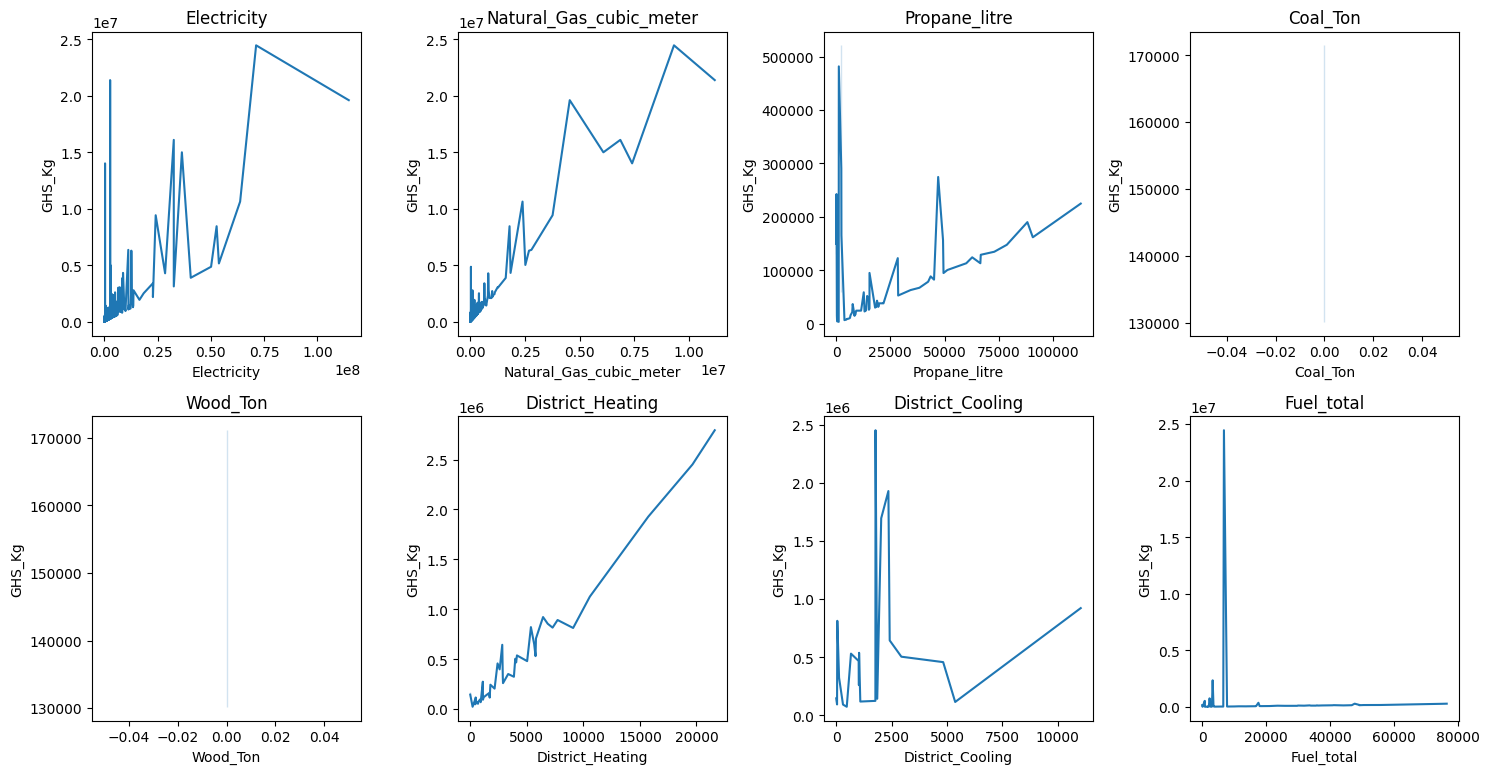

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))  # You can adjust the number of rows and columns as needed

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate through each continuous column and plot
for i, column in enumerate(continuous_columns):
    sns.lineplot(x=column, y='GHS_Kg', data=df, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('GHS_Kg')

# Adjust layout
plt.tight_layout()
plt.show()

Upin checking the distribution with all Numerical columns with GHS KG, it seems there is no normal distribution with GHS KG

Lets check with Sector, operation, and organization wise, how it affects.

In [33]:
df.head(1)

,Sector,Sub_Sector,Organization,Operation,Operation Type,Address,City,Postal Code,Electricity,Natural_Gas_cubic_meter,Propane_litre,Coal_Ton,Wood_Ton,District_Heating,District_Cooling,Fuel_total,GHS_Kg
0,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,1143005.6,220977.35,0.0,0.0,0.0,0.0,0.0,0.0,527560.002122


In [59]:
df['City'].value_counts()

Toronto        840
Ottawa         359
Owen Sound     204
Brampton       201
Mississauga    148
              ... 
Markham          1
Prescott         1
Milton           1
Lefaivre         1
Warwick          1
Name: City, Length: 406, dtype: int64

In [35]:
range_of_elec_GHS = df.groupby('Sector')[['Electricity', 'GHS_Kg']].mean()
range_of_elec_GHS

,Electricity,GHS_Kg
Sector,,
Municipal,5.285337e+05,1.244665e+05
Post-secondary Educational Institution,8.589747e+05,3.664966e+05
Public Hospital,2.967700e+06,1.259293e+06
School Board,3.458422e+05,1.344133e+05


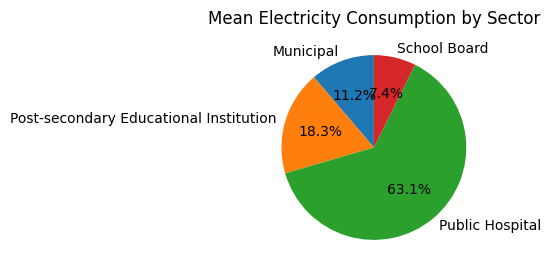

In [46]:
range_of_elec_GHS = range_of_elec_GHS.reset_index()

plt.figure(figsize=(3,3))
plt.pie(range_of_elec_GHS['Electricity'], labels=range_of_elec_GHS['Sector'], autopct='%1.1f%%', startangle=90)
plt.title('Mean Electricity Consumption by Sector')

# Show the plot
plt.show()

*** By this, we can see that Public Hospital produces High Electricity and causes in GHS Emmission. **bold text**

In [55]:
mean_natural_gas = df.groupby('Sub_Sector')[['Natural_Gas_cubic_meter']].mean()
mean_natural_gas = mean_natural_gas.reset_index()
mean_natural_gas

,Sub_Sector,Natural_Gas_cubic_meter
0,Acute,7.887547e+05
1,Acute/Chronic,4.617366e+05
2,College,6.170105e+04
3,Municipality,3.770917e+04
4,School Board,4.940686e+04
5,University,6.262088e+05
6,University,2.370862e+06
7,college,1.847607e+05


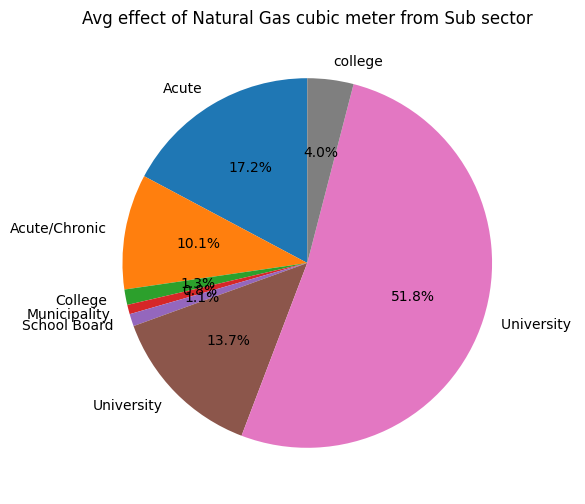

In [58]:
plt.figure(figsize= (6,6))
plt.pie(mean_natural_gas['Natural_Gas_cubic_meter'], labels= mean_natural_gas['Sub_Sector'], autopct='%1.1f%%', startangle = 90)
plt.title('Avg effect of Natural Gas cubic meter from Sub sector')
plt.show()

By this, University had high % while comparing to other sub sectors on Natural gas.

It seems that, University produces high amount of Natural gas

In [70]:
Top_10_city_GHS = df.groupby('City')['GHS_Kg'].mean().sort_values(ascending = False).head(10)
Top_10_city_GHS.index.to_list()

['Cobourg Ontario',
 'St Catharines',
 'Pain Court',
 'Etobicoke',
 'Arnprior',
 'Campbellford',
 'Cochrane',
 'Arva',
 'Brussels',
 'La Salle']

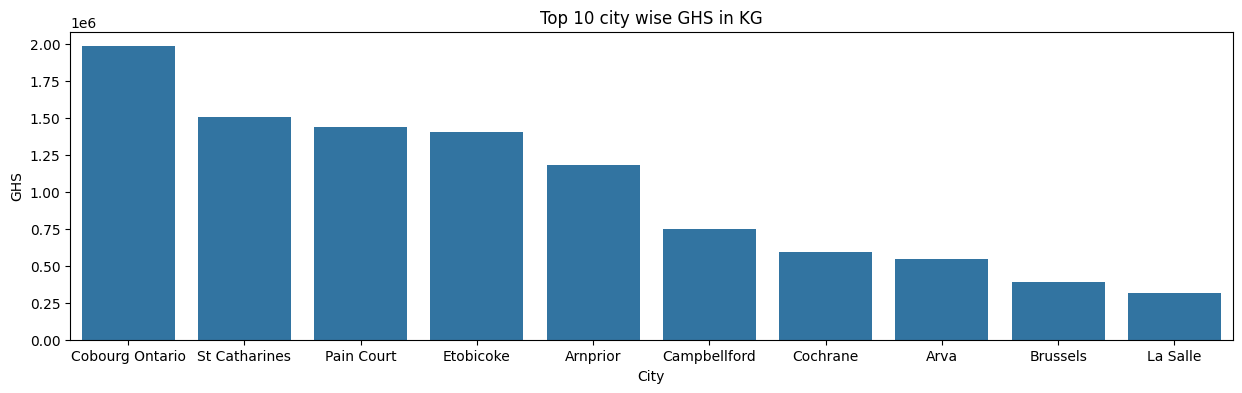

In [69]:
plt.figure(figsize=(15, 4))
sns.barplot(x = Top_10_city_GHS.index, y = Top_10_city_GHS)
plt.title('Top 10 city wise GHS in KG')
plt.xlabel('City')
plt.ylabel('GHS')
plt.show()

In [71]:
df['Operation Type'].value_counts()

Schools                                                                                639
Other                                                                                  445
Administrative offices and related facilities, including municipal council chambers    434
Storage facilities where equipment or vehicles are maintained, repaired or stored      414
Fire stations and associated offices and facilities                                    410
Community centres                                                                      405
Facilities related to the pumping of sewage                                            385
Cultural facilities                                                                    271
Facilities related to the pumping of water                                             260
Public libraries                                                                       250
Indoor recreational facilities                                                         180

In [83]:
top_3_op_type = df.groupby('Operation Type')['GHS_Kg'].mean().sort_values(ascending = True).head(3)
bottom_3_op_type = df.groupby('Operation Type')['GHS_Kg'].mean().sort_values(ascending=False).head(3)

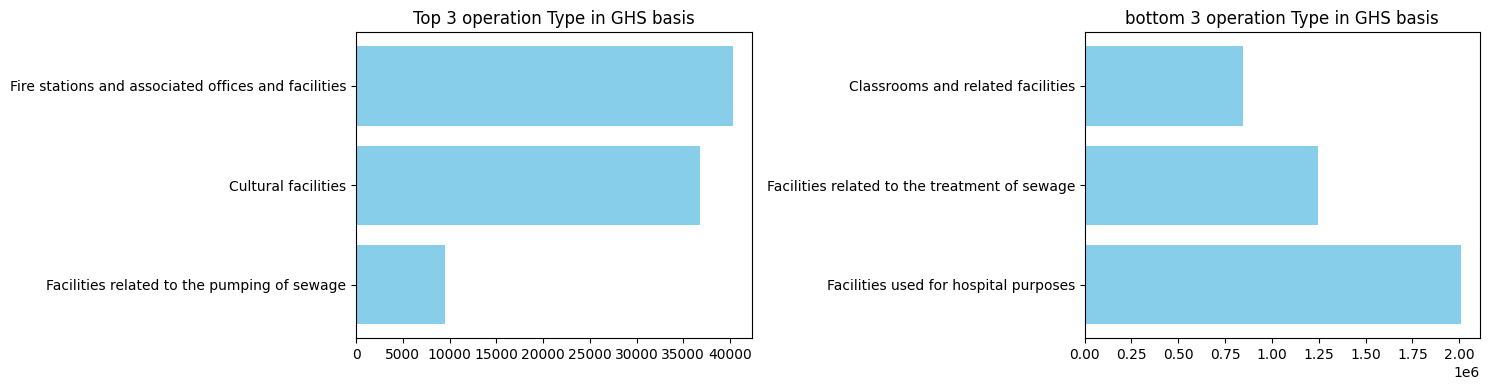

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))  # You can adjust the number of rows and columns as needed

# Flatten the axes for easier indexing
axes = axes.flatten()

axes[0].barh(top_3_op_type.index, top_3_op_type, color='skyblue')
axes[0].set_title('Top 3 operation Type in GHS basis')
axes[1].barh(bottom_3_op_type.index, bottom_3_op_type, color = 'skyblue')
axes[1].set_title('bottom 3 operation Type in GHS basis')
plt.tight_layout()
plt.show()

So, from the above charts representation, we can easily find top 3 Operation types which produce or affect Green House Emmission.

Top 3 which contribute high in GHS Emmission:
1. Fire stations and associated offices and facilities.
2. Cultural facilitites.
3. Facilities related to the pumping of sewage.